In [2]:
import fly_plot_lib.plot as fpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import figurefirst as fifi
# from statsmodels.stats import proportions_ztest

2.2.4
recommended version: 1.1.1 or greater


In [8]:
def slice_means_gs(df, index):
    time_vec=[]
    mean_vec=[]
    upper_vec =[]
    lower_vec =[]
    for i in df['time stamp'].unique():
        if i >-100 and i <3000:
            dummy_df =df[df['time stamp']==i]
            dummy_df=dummy_df[dummy_df['ground speed'].between(0, 2.0)]
            time_vec.append(i)
            mean = dummy_df[index].mean()
            upper= dummy_df[index].mean() + dummy_df[index].sem()*1.96
            lower= dummy_df[index].mean() - dummy_df[index].sem()*1.96
            mean_vec.append(mean)
            upper_vec.append(upper)
            lower_vec.append(lower)
    return time_vec, mean_vec, upper_vec, lower_vec

In [9]:
#helper function for slicing means with standard errors
def slice_head_prop(df, index='heading', time_key= "time stamp", start=-100, stop=3000):
    time_vec=[]
    uw_vec =[]
    cw_vec =[]
    dw_vec =[]
    df=df[df[time_key].between(start, stop)]
    for i in df[time_key].unique():
        dummy_df =df[df[time_key]==i]
        dummy_df=dummy_df[dummy_df['ground speed'].between(0, 2.0)]
        time_vec.append(i)
        tot =float(len(dummy_df))
        dummy_df['abs head'] =np.abs(dummy_df[index])
        #df[df < 2.0 ].count() 
        uw = dummy_df[dummy_df['abs head']<np.pi/4.].count()
        cw =dummy_df[dummy_df['abs head'].between(np.pi/4., 3.*np.pi/4)].count()
        dw =dummy_df[dummy_df['abs head']>3*np.pi/4.].count()
        uw_vec.append(uw/tot)
        cw_vec.append(cw/tot)
        dw_vec.append(dw/tot)
    return time_vec, uw_vec, cw_vec, dw_vec

In [10]:

no_wind= pd.read_csv('../trimmed_data/main/Orco_CsChrimson_still_air_merged.csv')
no_wind['ground speed']=(no_wind['xvel']**2 + no_wind['yvel']**2)**0.5

orco100=no_wind[no_wind['duration']==100]
orco0=no_wind[no_wind['duration']==0]

In [6]:
print(len(orco100))

327424


In [4]:
ms =4
lw= .5
fs =6

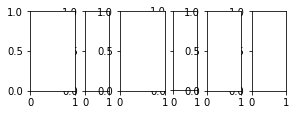

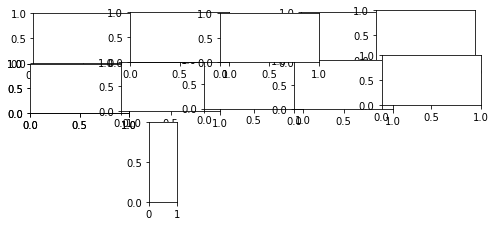

In [9]:
template= '../figure_first_templates/f2.svg'
layout =fifi.svg_to_axes.FigureLayout(template, autogenlayers=True, make_mplfigures=True, hide_layers=[])

In [5]:
traj_path = '../trajectories_for_figures/still_air/'

In [384]:
ax=layout.axes[('traj', 't1')]

In [6]:
t1=pd.read_csv(traj_path + 'traj_1.csv')

In [386]:
pre=t1[t1['time stamp'].between(-200, 0)]
dur=t1[t1['time stamp'].between(0, 675)]
post = t1[t1['time stamp'].between(675,4500)]
ax.plot(pre['x'], pre['y'], color ='k',alpha= 0.8, linewidth =lw)
ax.plot(dur['x'], dur['y'], color ='r', alpha =1, linewidth =lw)
ax.plot(post['x'], post['y'], color ='k', alpha = .8, linewidth = lw)

ax.scatter(pre['x'].iloc[0],pre['y'].iloc[0], marker = (3, 0, pre['heading'].iloc[0]*180/np.pi+15),s=ms, color ='k')
ax.scatter(dur['x'].iloc[60],dur['y'].iloc[60], marker = (3, 0, dur['heading'].iloc[60]*180/np.pi+20),s=ms,  color ='r')

ax.scatter(post['x'].iloc[60], post['y'].iloc[60], marker = (3, 0, post['heading'].iloc[60]*180/np.pi+20),s=ms, color ='k')
#ax.scatter(post['x'].iloc[90], post['y'].iloc[90], marker = (3, 0, post['heading'].iloc[90]*180/np.pi),s=ms, color ='k')
ax.scatter(post['x'].iloc[130],post['y'].iloc[130], marker = (3, 0, post['heading'].iloc[130]+90),s=ms, color ='k', zorder=4)
ax.scatter(post['x'].iloc[210],post['y'].iloc[210], marker = (3, 0, post['heading'].iloc[210]),s=ms, color ='k', zorder=4)
ax.scatter(post['x'].iloc[270],post['y'].iloc[270], marker = (3, 0, post['heading'].iloc[270]+65),s=ms, color ='k', zorder=4)
ax.scatter(post['x'].iloc[-1],post['y'].iloc[-1], marker = (3, 0, post['heading'].iloc[-1]+90),s=ms, color ='k', zorder=4)
#ax.scatter(orco_traj2['x'].iloc[260],orco_traj2['y'].iloc[260], marker = (3, 0, orco_traj2['heading'].iloc[0]+180),s=ms, color ='k',  zorder=4)
#ax.scatter(orco_traj2['x'].iloc[-1],orco_traj2['y'].iloc[-1], marker = (3, 0, orco_traj2['heading'].iloc[0]),s=ms, color ='k',  zorder=4)
ax.set_xlim(-.5, .5)
ax.set_ylim(-.25, .25)
fifi.mpl_functions.set_fontsize(ax, fs)
fifi.mpl_functions.adjust_spines(ax, [], xticks =[], yticks=[])


In [387]:
ax=layout.axes[('traj', 't2')]

In [8]:
t2=pd.read_csv(traj_path+'traj_2.csv')

In [389]:
pre=t2[t2['time stamp'].between(-200, 0)]
dur=t2[t2['time stamp'].between(0, 675)]
post = t2[t2['time stamp'].between(675,4500)]
ax.plot(pre['x'], pre['y'], color ='k',alpha= 0.8, linewidth =lw)
ax.plot(dur['x'], dur['y'], color ='r', alpha =1, linewidth =lw)
ax.plot(post['x'], post['y'], color ='k', alpha = .8, linewidth = lw)

ax.scatter(pre['x'].iloc[0],pre['y'].iloc[0], marker = (3, 0, pre['heading'].iloc[0]*180/np.pi +30),s=ms, color ='k')
ax.scatter(dur['x'].iloc[60],dur['y'].iloc[60], marker = (3, 0, dur['heading'].iloc[60]*180/np.pi+20),s=ms,  color ='r')

ax.scatter(post['x'].iloc[60], post['y'].iloc[60], marker = (3, 0, post['heading'].iloc[60]*180/np.pi+45),s=ms, color ='k')
#ax.scatter(post['x'].iloc[90], post['y'].iloc[90], marker = (3, 0, post['heading'].iloc[90]*180/np.pi),s=ms, color ='k')
ax.scatter(post['x'].iloc[130],post['y'].iloc[130], marker = (3, 0, post['heading'].iloc[130]),s=ms, color ='k', zorder=4)
ax.scatter(post['x'].iloc[230],post['y'].iloc[230], marker = (3, 0, post['heading'].iloc[230]-45),s=ms, color ='k', zorder=4)
ax.scatter(post['x'].iloc[300],post['y'].iloc[300], marker = (3, 0, post['heading'].iloc[300]+110),s=ms, color ='k', zorder=4)
ax.scatter(post['x'].iloc[-1],post['y'].iloc[-1], marker = (3, 0, post['heading'].iloc[-1]),s=ms, color ='k', zorder=4)
#ax.scatter(orco_traj2['x'].iloc[260],orco_traj2['y'].iloc[260], marker = (3, 0, orco_traj2['heading'].iloc[0]+180),s=ms, color ='k',  zorder=4)
#ax.scatter(orco_traj2['x'].iloc[-1],orco_traj2['y'].iloc[-1], marker = (3, 0, orco_traj2['heading'].iloc[0]),s=ms, color ='k',  zorder=4)
ax.set_xlim(-.5, .5)
ax.set_ylim(-.25, .25)
fifi.mpl_functions.set_fontsize(ax, fs)
fifi.mpl_functions.adjust_spines(ax, [], xticks =[], yticks=[])


In [390]:
ax=layout.axes[('traj', 't3')]

In [17]:
t12=pd.read_csv(traj_path+'traj_12.csv')

In [392]:
pre=t12[t12['time stamp'].between(-200, 0)]
dur=t12[t12['time stamp'].between(0, 675)]
post = t12[t12['time stamp'].between(675,4000)]
ax.plot(pre['x'], pre['y'], color ='k',alpha= 0.8, linewidth =lw)
ax.plot(dur['x'], dur['y'], color ='r', alpha =1, linewidth =lw)
ax.plot(post['x'], post['y'], color ='k', alpha = .8, linewidth = lw)

ax.scatter(pre['x'].iloc[0],pre['y'].iloc[0], marker = (3, 0, pre['heading'].iloc[0]*180/np.pi+40),s=ms, color ='k')
ax.scatter(dur['x'].iloc[28],dur['y'].iloc[28], marker = (3, 0, dur['heading'].iloc[28]*180/np.pi+20),s=ms,  color ='r')

ax.scatter(post['x'].iloc[8], post['y'].iloc[8], marker = (3, 0, post['heading'].iloc[8]*180/np.pi+7),s=ms, color ='k')
#ax.scatter(post['x'].iloc[90], post['y'].iloc[90], marker = (3, 0, post['heading'].iloc[90]*180/np.pi),s=ms, color ='k')
ax.scatter(post['x'].iloc[100],post['y'].iloc[100], marker = (3, 0, post['heading'].iloc[100]),s=ms, color ='k', zorder=4)
ax.scatter(post['x'].iloc[175],post['y'].iloc[175], marker = (3, 0, post['heading'].iloc[175]),s=ms, color ='k', zorder=4)
ax.scatter(post['x'].iloc[250],post['y'].iloc[250], marker = (3, 0, post['heading'].iloc[270]+65),s=ms, color ='k', zorder=4)
ax.scatter(post['x'].iloc[-1],post['y'].iloc[-1], marker = (3, 0, post['heading'].iloc[-1]+90),s=ms, color ='k', zorder=4)
#ax.scatter(orco_traj2['x'].iloc[260],orco_traj2['y'].iloc[260], marker = (3, 0, orco_traj2['heading'].iloc[0]+180),s=ms, color ='k',  zorder=4)
#ax.scatter(orco_traj2['x'].iloc[-1],orco_traj2['y'].iloc[-1], marker = (3, 0, orco_traj2['heading'].iloc[0]),s=ms, color ='k',  zorder=4)
ax.set_xlim(-.5, .5)
ax.set_ylim(-.25, .25)
fifi.mpl_functions.set_fontsize(ax, fs)
fifi.mpl_functions.adjust_spines(ax, [], xticks =[], yticks=[])

In [10]:
ax=layout.axes[('traj', 't4')]
t3=pd.read_csv(traj_path + 'traj_3.csv')

In [394]:
pre=t3[t3['time stamp'].between(-200, 0)]
dur=t3[t3['time stamp'].between(0, 675)]
post = t3[t3['time stamp'].between(675,5000)]
ax.plot(pre['x'], pre['y'], color ='k',alpha= 0.8, linewidth =lw)
ax.plot(dur['x'], dur['y'], color ='r', alpha =1, linewidth =lw)
ax.plot(post['x'], post['y'], color ='k', alpha = .8, linewidth = lw)

ax.scatter(pre['x'].iloc[0],pre['y'].iloc[0], marker = (3, 0, pre['heading'].iloc[0]*180/np.pi+20),s=ms, color ='k')
ax.scatter(dur['x'].iloc[35],dur['y'].iloc[35], marker = (3, 0, dur['heading'].iloc[35]*180/np.pi+15),s=ms,  color ='r')

ax.scatter(post['x'].iloc[65], post['y'].iloc[65], marker = (3, 0, post['heading'].iloc[65]*180/np.pi+20),s=ms, color ='k')
ax.scatter(post['x'].iloc[140], post['y'].iloc[140], marker = (3, 0, post['heading'].iloc[140]*180/np.pi+30),s=ms, color ='k')
ax.scatter(post['x'].iloc[200],post['y'].iloc[200], marker = (3, 0, post['heading'].iloc[200]+35),s=ms, color ='k', zorder=4)
#ax.scatter(post['x'].iloc[210],post['y'].iloc[210], marker = (3, 0, post['heading'].iloc[210]),s=ms, color ='k', zorder=4)
#ax.scatter(post['x'].iloc[270],post['y'].iloc[270], marker = (3, 0, post['heading'].iloc[270]+65),s=ms, color ='k', zorder=4)
ax.scatter(post['x'].iloc[-1],post['y'].iloc[-1], marker = (3, 0, post['heading'].iloc[-1]+90),s=ms, color ='k', zorder=4)
#ax.scatter(orco_traj2['x'].iloc[260],orco_traj2['y'].iloc[260], marker = (3, 0, orco_traj2['heading'].iloc[0]+180),s=ms, color ='k',  zorder=4)
#ax.scatter(orco_traj2['x'].iloc[-1],orco_traj2['y'].iloc[-1], marker = (3, 0, orco_traj2['heading'].iloc[0]),s=ms, color ='k',  zorder=4)
ax.set_xlim(-.5, .5)
ax.set_ylim(-.25, .25)
fifi.mpl_functions.set_fontsize(ax, fs)
fifi.mpl_functions.adjust_spines(ax, [], xticks =[], yticks=[])

In [395]:
ax=layout.axes[('traj', 't5')]

In [22]:
t5=pd.read_csv(traj_path+'traj_5.csv')

In [397]:
pre=t5[t5['time stamp'].between(-200, 0)]
dur=t5[t5['time stamp'].between(0, 675)]
post = t5[t5['time stamp'].between(675,5000)]
#ax.plot(pre['x'], pre['y'], color ='k',alpha= 0.8, linewidth =lw)
ax.plot(dur['x'], dur['y'], color ='r', alpha =1, linewidth =lw)
ax.plot(post['x'], post['y'], color ='k', alpha = .8, linewidth = lw)

ax.scatter(pre['x'].iloc[3],pre['y'].iloc[3], marker = (3, 0, pre['heading'].iloc[0]*180/np.pi+15),s=ms, color ='k')
ax.scatter(dur['x'].iloc[14],dur['y'].iloc[14], marker = (3, 0, dur['heading'].iloc[20]*180/np.pi+70),s=ms,  color ='r')

ax.scatter(post['x'].iloc[120], post['y'].iloc[120], marker = (3, 0, post['heading'].iloc[120]*180/np.pi+30),s=ms, color ='k')
ax.scatter(post['x'].iloc[200], post['y'].iloc[200], marker = (3, 0, post['heading'].iloc[200]*180/np.pi+45),s=ms, color ='k')
ax.scatter(post['x'].iloc[270],post['y'].iloc[270], marker = (3, 0, post['heading'].iloc[270]+75),s=ms, color ='k', zorder=4)
ax.scatter(post['x'].iloc[330],post['y'].iloc[330], marker = (3, 0, post['heading'].iloc[330]-20),s=ms, color ='k', zorder=4)
#ax.scatter(post['x'].iloc[270],post['y'].iloc[270], marker = (3, 0, post['heading'].iloc[270]+65),s=ms, color ='k', zorder=4)
ax.scatter(post['x'].iloc[-1],post['y'].iloc[-1], marker = (3, 0, post['heading'].iloc[-1]+30),s=ms, color ='k', zorder=4)
#ax.scatter(orco_traj2['x'].iloc[260],orco_traj2['y'].iloc[260], marker = (3, 0, orco_traj2['heading'].iloc[0]+180),s=ms, color ='k',  zorder=4)
#ax.scatter(orco_traj2['x'].iloc[-1],orco_traj2['y'].iloc[-1], marker = (3, 0, orco_traj2['heading'].iloc[0]),s=ms, color ='k',  zorder=4)
ax.set_xlim(-.5, .5)
ax.set_ylim(-.25, .25)
fifi.mpl_functions.set_fontsize(ax, fs)
fifi.mpl_functions.adjust_spines(ax, [], xticks =[], yticks=[])

In [24]:
ax=layout.axes[('traj', 't6')]
t9=pd.read_csv(traj_path+'traj_9.csv')

In [399]:
pre=t9[t9['time stamp'].between(-200, 0)]
dur=t9[t9['time stamp'].between(0, 675)]
post = t9[t9['time stamp'].between(675,5000)]
ax.plot(pre['x'], pre['y'], color ='k',alpha= 0.8, linewidth =lw)
ax.plot(dur['x'], dur['y'], color ='r', alpha =1, linewidth =lw)
ax.plot(post['x'], post['y'], color ='k', alpha = .8, linewidth = lw)

ax.scatter(pre['x'].iloc[0],pre['y'].iloc[0], marker = (3, 0, pre['heading'].iloc[0]*180/np.pi+25),s=ms, color ='k')
ax.scatter(dur['x'].iloc[45],dur['y'].iloc[45], marker = (3, 0, dur['heading'].iloc[40]*180/np.pi+20),s=ms,  color ='r')

ax.scatter(post['x'].iloc[55], post['y'].iloc[55], marker = (3, 0, post['heading'].iloc[45]*180/np.pi+115),s=ms, color ='k')
ax.scatter(post['x'].iloc[150], post['y'].iloc[150], marker = (3, 0, post['heading'].iloc[90]*180/np.pi+85),s=ms, color ='k')
ax.scatter(post['x'].iloc[95],post['y'].iloc[95], marker = (3, 0, post['heading'].iloc[130]+15),s=ms, color ='k', zorder=4)
ax.scatter(post['x'].iloc[180],post['y'].iloc[180], marker = (3, 0, post['heading'].iloc[190]),s=ms, color ='k', zorder=4)
#ax.scatter(post['x'].iloc[270],post['y'].iloc[270], marker = (3, 0, post['heading'].iloc[270]+65),s=ms, color ='k', zorder=4)
ax.scatter(post['x'].iloc[-1],post['y'].iloc[-1], marker = (3, 0, post['heading'].iloc[-1]+25),s=ms, color ='k', zorder=4)
#ax.scatter(orco_traj2['x'].iloc[260],orco_traj2['y'].iloc[260], marker = (3, 0, orco_traj2['heading'].iloc[0]+180),s=ms, color ='k',  zorder=4)
#ax.scatter(orco_traj2['x'].iloc[-1],orco_traj2['y'].iloc[-1], marker = (3, 0, orco_traj2['heading'].iloc[0]),s=ms, color ='k',  zorder=4)
ax.set_xlim(-.5, .5)
ax.set_ylim(-.25, .25)
fifi.mpl_functions.set_fontsize(ax, fs)
fifi.mpl_functions.adjust_spines(ax, [], xticks =[], yticks=[])


In [26]:
ax=layout.axes[('traj', 't7')]
t8=pd.read_csv(traj_path +'traj_8.csv')

In [401]:
pre=t8[t8['time stamp'].between(-200, 0)]
dur=t8[t8['time stamp'].between(0, 675)]
post = t8[t8['time stamp'].between(675,3500)]
ax.plot(pre['x'], pre['y'], color ='k',alpha= 0.8, linewidth =lw)
ax.plot(dur['x'], dur['y'], color ='r', alpha =1, linewidth =lw)
ax.plot(post['x'], post['y'], color ='k', alpha = .8, linewidth = lw)

ax.scatter(pre['x'].iloc[0],pre['y'].iloc[0], marker = (3, 0, pre['heading'].iloc[0]*180/np.pi+45),s=ms, color ='k')
ax.scatter(dur['x'].iloc[30],dur['y'].iloc[30], marker = (3, 0, dur['heading'].iloc[40]*180/np.pi+25),s=ms,  color ='r')

ax.scatter(post['x'].iloc[50], post['y'].iloc[50], marker = (3, 0, post['heading'].iloc[60]*180/np.pi+20),s=ms, color ='k')
ax.scatter(post['x'].iloc[92], post['y'].iloc[92], marker = (3, 0, post['heading'].iloc[90]*180/np.pi+30),s=ms, color ='k')
ax.scatter(post['x'].iloc[175],post['y'].iloc[175], marker = (3, 0, post['heading'].iloc[130]+110),s=ms, color ='k', zorder=4)
#ax.scatter(post['x'].iloc[210],post['y'].iloc[210], marker = (3, 0, post['heading'].iloc[210]),s=ms, color ='k', zorder=4)
#ax.scatter(post['x'].iloc[270],post['y'].iloc[270], marker = (3, 0, post['heading'].iloc[270]+65),s=ms, color ='k', zorder=4)
ax.scatter(post['x'].iloc[-1],post['y'].iloc[-1], marker = (3, 0, post['heading'].iloc[-1]+45),s=ms, color ='k', zorder=4)
#ax.scatter(orco_traj2['x'].iloc[260],orco_traj2['y'].iloc[260], marker = (3, 0, orco_traj2['heading'].iloc[0]+180),s=ms, color ='k',  zorder=4)
#ax.scatter(orco_traj2['x'].iloc[-1],orco_traj2['y'].iloc[-1], marker = (3, 0, orco_traj2['heading'].iloc[0]),s=ms, color ='k',  zorder=4)
ax.set_xlim(-.5, .5)
ax.set_ylim(-.25, .25)
fifi.mpl_functions.set_fontsize(ax, fs)
fifi.mpl_functions.adjust_spines(ax, [], xticks =[], yticks=[])

In [28]:
ax=layout.axes[('traj', 't8')]
t11=pd.read_csv(traj_path+'traj_11.csv')

In [403]:

pre=t11[t11['time stamp'].between(-300, 0)]
dur=t11[t11['time stamp'].between(0, 675)]
post = t11[t11['time stamp'].between(675,5000)]
ax.plot(pre['x'], pre['y'], color ='k',alpha= 0.8, linewidth =lw)
ax.plot(dur['x'], dur['y'], color ='r', alpha =1, linewidth =lw)
ax.plot(post['x'], post['y'], color ='k', alpha = .8, linewidth = lw)

ax.scatter(pre['x'].iloc[0],pre['y'].iloc[0], marker = (3, 0, pre['heading'].iloc[0]*180/np.pi+45),s=ms, color ='k')
ax.scatter(dur['x'].iloc[50],dur['y'].iloc[50], marker = (3, 0, dur['heading'].iloc[60]*180/np.pi+20),s=ms,  color ='r')

ax.scatter(post['x'].iloc[80], post['y'].iloc[80], marker = (3, 0, post['heading'].iloc[80]*180/np.pi+15),s=ms, color ='k')
#ax.scatter(post['x'].iloc[90], post['y'].iloc[90], marker = (3, 0, post['heading'].iloc[90]*180/np.pi),s=ms, color ='k')
ax.scatter(post['x'].iloc[140],post['y'].iloc[140], marker = (3, 0, post['heading'].iloc[150]+90),s=ms, color ='k', zorder=4)
ax.scatter(post['x'].iloc[230],post['y'].iloc[230], marker = (3, 0, post['heading'].iloc[230]),s=ms, color ='k', zorder=4)
#ax.scatter(post['x'].iloc[270],post['y'].iloc[270], marker = (3, 0, post['heading'].iloc[270]+65),s=ms, color ='k', zorder=4)
ax.scatter(post['x'].iloc[-1],post['y'].iloc[-1], marker = (3, 0, post['heading'].iloc[-1]+90),s=ms, color ='k', zorder=4)
#ax.scatter(orco_traj2['x'].iloc[260],orco_traj2['y'].iloc[260], marker = (3, 0, orco_traj2['heading'].iloc[0]+180),s=ms, color ='k',  zorder=4)
#ax.scatter(orco_traj2['x'].iloc[-1],orco_traj2['y'].iloc[-1], marker = (3, 0, orco_traj2['heading'].iloc[0]),s=ms, color ='k',  zorder=4)
ax.set_xlim(-.5, .5)
ax.set_ylim(-.25, .25)
fifi.mpl_functions.set_fontsize(ax, fs)
fifi.mpl_functions.adjust_spines(ax, [], xticks =[], yticks=[])

In [30]:
ax=layout.axes[('traj', 't9')]
t10=pd.read_csv(traj_path+'traj_7.csv')

In [405]:
pre=t10[t10['time stamp'].between(-300, 0)]
dur=t10[t10['time stamp'].between(0, 675)]
post = t10[t10['time stamp'].between(675,4000)]
ax.plot(pre['x'], pre['y'], color ='k',alpha= 0.8, linewidth =lw)
ax.plot(dur['x'], dur['y'], color ='r', alpha =1, linewidth =lw)
ax.plot(post['x'], post['y'], color ='k', alpha = .8, linewidth = lw)

ax.scatter(pre['x'].iloc[0],pre['y'].iloc[0], marker = (3, 0, pre['heading'].iloc[0]*180/np.pi+30),s=ms, color ='k')
ax.scatter(dur['x'].iloc[15],dur['y'].iloc[15], marker = (3, 0, dur['heading'].iloc[15]*180/np.pi+20),s=ms,  color ='r')

ax.scatter(post['x'].iloc[50], post['y'].iloc[50], marker = (3, 0, post['heading'].iloc[80]*180/np.pi+15),s=ms, color ='k')
ax.scatter(post['x'].iloc[115], post['y'].iloc[115], marker = (3, 0, post['heading'].iloc[110]*180/np.pi+120),s=ms, color ='k')
ax.scatter(post['x'].iloc[210],post['y'].iloc[210], marker = (3, 0, post['heading'].iloc[210]+45),s=ms, color ='k', zorder=4)
ax.scatter(post['x'].iloc[300],post['y'].iloc[300], marker = (3, 0, post['heading'].iloc[300]+65),s=ms, color ='k', zorder=4)
#ax.scatter(post['x'].iloc[390],post['y'].iloc[390], marker = (3, 0, post['heading'].iloc[270]+65),s=ms, color ='k', zorder=4)
#ax.scatter(post['x'].iloc[40],post['y'].iloc[450], marker = (3, 0, post['heading'].iloc[270]+65),s=ms, color ='k', zorder=4)
ax.scatter(post['x'].iloc[-1],post['y'].iloc[-1], marker = (3, 0, post['heading'].iloc[-1]),s=ms, color ='k', zorder=4)
#ax.scatter(orco_traj2['x'].iloc[260],orco_traj2['y'].iloc[260], marker = (3, 0, orco_traj2['heading'].iloc[0]+180),s=ms, color ='k',  zorder=4)
#ax.scatter(orco_traj2['x'].iloc[-1],orco_traj2['y'].iloc[-1], marker = (3, 0, orco_traj2['heading'].iloc[0]),s=ms, color ='k',  zorder=4)
ax.set_xlim(-.5, .5)
ax.set_ylim(-.25, .25)
fifi.mpl_functions.set_fontsize(ax, fs)
fifi.mpl_functions.adjust_spines(ax, [], xticks =[], yticks=[])

In [32]:
ax=layout.axes[('traj', 't13')]
t12=pd.read_csv(traj_path+'sacc_for_ang-vel_rep.csv')

In [407]:
pre=t12[t12['time stamp'].between(-200, 0)]
dur=t12[t12['time stamp'].between(0, 675)]
post = t12[t12['time stamp'].between(675,5000)]
ax.plot(pre['x'], pre['y'], color ='k',alpha= 0.8, linewidth =lw)
ax.plot(dur['x'], dur['y'], color ='r', alpha =1, linewidth =lw)
ax.plot(post['x'], post['y'], color ='k', alpha = .8, linewidth = lw)

ax.scatter(pre['x'].iloc[0],pre['y'].iloc[0], marker = (3, 0, pre['heading'].iloc[0]*180/np.pi+45),s=ms, color ='k')
ax.scatter(dur['x'].iloc[10],dur['y'].iloc[10], marker = (3, 0, dur['heading'].iloc[20]*180/np.pi+23),s=ms,  color ='r')

ax.scatter(post['x'].iloc[28], post['y'].iloc[28], marker = (3, 0, post['heading'].iloc[25]*180/np.pi+35),s=ms, color ='k')
ax.scatter(post['x'].iloc[70], post['y'].iloc[70], marker = (3, 0, post['heading'].iloc[90]*180/np.pi+45),s=ms, color ='k')
ax.scatter(post['x'].iloc[135],post['y'].iloc[135], marker = (3, 0, post['heading'].iloc[130]+90),s=ms, color ='k', zorder=4)
ax.scatter(post['x'].iloc[225],post['y'].iloc[225], marker = (3, 0, post['heading'].iloc[225]+90),s=ms, color ='k', zorder=4)

ax.scatter(post['x'].iloc[270],post['y'].iloc[270], marker = (3, 0, post['heading'].iloc[270]+65),s=ms, color ='k', zorder=4)
ax.scatter(post['x'].iloc[340],post['y'].iloc[340], marker = (3, 0, post['heading'].iloc[270]),s=ms, color ='k', zorder=4)
ax.scatter(post['x'].iloc[-1],post['y'].iloc[-1], marker = (3, 0, post['heading'].iloc[-1]+40),s=ms, color ='k', zorder=4)
#ax.scatter(orco_traj2['x'].iloc[260],orco_traj2['y'].iloc[260], marker = (3, 0, orco_traj2['heading'].iloc[0]+180),s=ms, color ='k',  zorder=4)
#ax.scatter(orco_traj2['x'].iloc[-1],orco_traj2['y'].iloc[-1], marker = (3, 0, orco_traj2['heading'].iloc[0]),s=ms, color ='k',  zorder=4)
ax.set_xlim(-.5, .5)
ax.set_ylim(-.25, .25)
fifi.mpl_functions.set_fontsize(ax, fs)
fifi.mpl_functions.adjust_spines(ax, [], xticks =[], yticks=[])

In [408]:
ax=layout.axes[('traj', 't10')]

In [409]:
ang1=no_wind[no_wind['obj_id_unique']==t12['obj_id_unique'][0]]
ang1=ang1[ang1['time stamp'].between(-100, 5000)]
ang1['wrap_test']=np.unwrap(ang1['heading'])
ang1['ang vel wrap']=ang1['wrap_test'].diff()/(.01)

In [410]:
pre=ang1[ang1['time stamp'].between(-100, 0)]
dur = ang1[ang1['time stamp'].between(0, 675)]
post = ang1[ang1['time stamp'].between(675, 5000)]
ax.plot(pre['ang vel wrap'], pre['time stamp'] , color = 'k', linewidth = lw)
ax.plot(dur['ang vel wrap'], dur['time stamp'], color = 'r', linewidth = lw)
ax.plot(post['ang vel wrap'], post['time stamp'], color = 'k', linewidth = lw)
#ax.axvspan(0, 675, color = 'red', alpha = 0.1)
ax.set_xticklabels([])
ax.set_yticklabels([])
fifi.mpl_functions.adjust_spines(ax, ['bottom'], xticks =[-60, 0, 60], yticks=[-60, 0, 60], tick_length=3, linewidth = .5 )
ax.set_xlim(-60, 60)
ax.set_ylim(-100, 5000)
#ax.set_ylabel("radians/s")
#ax.set_xlabel("Time (ms)")
fifi.mpl_functions.set_fontsize(ax, 6)


# Heat maps for course direction in the wind tunnel frame, since there is no wind

In [411]:
ax=layout.axes[('meat', 'hm_f')]

In [412]:
cmap_reversed = plt.cm.get_cmap('bone_r')
ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_xlim(-3.2, 3.2)
a = np.arange(-100,3000,10)
b = np.linspace(-np.pi, np.pi, 180)
x = np.arange(-100,3010, 10)
y = np.linspace(-np.pi, np.pi, 181)
bin_values,_,__ = np.histogram2d(orco100['time stamp'], orco100['heading'],  bins =(x, y))

newdf = pd.DataFrame(bin_values.T, columns=a, index=b)
sumz = newdf.sum(axis=0)

newdf_normed= newdf
for i in range(0,len(sumz)):
    newdf_normed.iloc[:,i] = newdf.iloc[:,i]/sumz.iloc[i]
X,Y = np.meshgrid(x,y)
# Plot the heatmap
ax.pcolormesh(Y, X, newdf_normed, vmin=0, vmax=0.04, cmap='bone_r', shading='flat', rasterized=True)
ax.set_xticklabels([r'-$\pi$', r'-$\pi/2$', '0',r'$\pi/2$', r'$\pi$' ])

ax.set_yticklabels([])

fifi.mpl_functions.adjust_spines(ax, ['left','bottom'], xticks =[-3.14, -3.14/2, 0, 3.14/2, 3.14], yticks=[0, 675, 3000],  tick_length=3, linewidth=.5)
fifi.mpl_functions.set_fontsize(ax, fs)

In [413]:
ax=layout.axes[('meat', 'hm_s')]

In [414]:
cmap_reversed = plt.cm.get_cmap('bone_r')
#ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_xlim(-3.2, 3.2)
a = np.arange(-100,3000,10)
b = np.linspace(-np.pi, np.pi, 180)
x = np.arange(-100,3010, 10)
y = np.linspace(-np.pi, np.pi, 181)
bin_values,_,__ = np.histogram2d(orco0['time stamp'], orco0['heading'],  bins =(x, y))

newdf = pd.DataFrame(bin_values.T, columns=a, index=b)
sumz = newdf.sum(axis=0)

newdf_normed= newdf
for i in range(0,len(sumz)):
    newdf_normed.iloc[:,i] = newdf.iloc[:,i]/sumz.iloc[i]
X,Y = np.meshgrid(x,y)
# Plot the heatmap
ax.pcolormesh(Y, X, newdf_normed, vmin=0, vmax=0.04, cmap='bone_r', shading='flat', rasterized=True)


ax.set_xticklabels([])
ax.set_yticklabels([])

fifi.mpl_functions.adjust_spines(ax, ['left','bottom'], xticks =[-3.14, -3.14/2, 0, 3.14/2, 3.14], yticks=[0, 675, 3000],  tick_length=3, linewidth=.5)
fifi.mpl_functions.set_fontsize(ax, fs)

# Ground speed response

In [415]:
ax=layout.axes[('meat', 'gs')]

In [416]:
#Grab population mean and error boundaries for both flash and sham subsets for orco flies
t, m, u, l= slice_means_gs(orco100, 'ground speed')
t0, m0, u0, l0=slice_means_gs(orco0, 'ground speed')

In [417]:
ax.plot(m, t, color = 'red', label = 'Orco>csChrimson', linewidth =.5)
ax.plot(m0, t0, color ='k', label = 'Control', linewidth=.5)

ax.fill_betweenx(t0, u0, l0, color = 'k', alpha = 0.2, label = '', linewidth =0)

ax.fill_betweenx(t, u, l, color = 'red', alpha = 0.2, label = '', linewidth =0)
ax.set_ylim(-100, 3000)
ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_yticklabels([' ',' ', ' '])
ax.set_xticklabels([' ',' '])
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'],xticks=[0, .6], yticks=[0, 675, 3000], tick_length=3, linewidth=lw)
fifi.mpl_functions.set_fontsize(ax, fs)


# Altitude response

In [418]:
ax=layout.axes[('meat', 'alt')]

In [419]:
#Grab population mean and error boundaries for both flash and sham subsets for orco flies
t, m, u, l= slice_means_gs(orco100, 'z')
t0, m0, u0, l0=slice_means_gs(orco0, 'z')

In [420]:
ax.plot(m, t, color = 'red', label = 'Orco>csChrimson', linewidth =.5)
ax.plot(m0, t0, color ='k', label = 'Control', linewidth=.5)
#ax.set_ylabel("Ground Speed (m/s)")
ax.fill_betweenx(t0, u0, l0, color = 'k', alpha = 0.2, label = '', linewidth =0)
ax.fill_betweenx(t, u, l, color = 'red', alpha = 0.2, label = '', linewidth =0)
ax.set_ylim(-100, 3000)
ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_yticklabels([' ',' ', ' '])
ax.set_xticklabels([' ',' '])
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'],xticks=[0, .5], yticks=[0, 675, 3000], tick_length=3, linewidth=lw)
fifi.mpl_functions.set_fontsize(ax, fs)


# Proportion of traj's in each tunnel orientation

In [421]:
ax=layout.axes[('meat', 'prop_f')]

In [422]:
t, uw, cw, dw= slice_head_prop(orco100)

In [423]:
ax.plot(uw, t, color = 'green', linewidth =.5)
ax.plot(cw, t, color ='blue', linewidth=.5)
ax.plot(dw, t, color = 'orange', linewidth =.5)
ax.set_ylim(-100, 3000)
ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_yticklabels([' ',' ', ' '])
ax.set_xticklabels([' ',' '])
fifi.mpl_functions.adjust_spines(ax, ['bottom'],xticks=[0, 1.0], yticks=[0, 675, 3000], tick_length=3, linewidth=lw)
fifi.mpl_functions.set_fontsize(ax, fs)


In [424]:
ax=layout.axes[('meat', 'prop_s')]

In [ ]:
t0, uw0, cw0, dw0= slice_head_prop(orco0)

In [ ]:
ax.plot(uw0, t0, color = 'green', linewidth =.5)
ax.plot(cw0, t0, color ='blue', linewidth=.5)
ax.plot(dw0, t0, color = 'orange', linewidth =.5)
ax.set_ylim(-100, 3000)
#ax.axhspan(0, 675, color = 'red', alpha = 0.1)
ax.set_yticklabels([' ',' ', ' '])
ax.set_xticklabels([' ',' '])
fifi.mpl_functions.adjust_spines(ax, ['bottom'],xticks=[0, 1.0], yticks=[0, 675, 3000], tick_length=3, linewidth=lw)
fifi.mpl_functions.set_fontsize(ax, fs)


# Save to figure first layout

In [ ]:
layout.append_figure_to_layer(layout.figures['traj'], 'traj', cleartarget=True)
layout.append_figure_to_layer(layout.figures['meat'], 'meat', cleartarget=True)
layout.write_svg(temlpate)

# Figure first doesn't have a way of handling the 3dAxis object type so made 3d plot separately

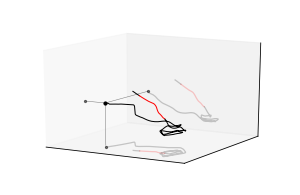

In [454]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection ='3d')
ax.grid(False)
ax.view_init(15)
ax.set_xlim(-.5, .5)
ax.set_ylim(-.25, .25)
ax.set_zlim(0, .5)
ax.set_aspect(1.25)

ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.plot(pre['x'], pre['y'], pre['z'], color = 'k', linewidth = lw+.5)
ax.plot(pre['x'], pre['y'], -.06, color ='k', alpha = 0.2, linewidth = lw+.75)
ax.plot(dur['x'], dur['y'], dur['z'], color = 'red', linewidth = lw+.5)
ax.plot(dur['x'], dur['y'], -.06, color ='red', alpha = 0.2, linewidth = lw+.75)
ax.plot(post['x'], post['y'], post['z'], color = 'k', linewidth = lw+.5)
ax.plot(post['x'], post['y'], -0.06, color ='k', alpha = 0.2, linewidth = lw+.75)
ax.scatter(post['x'].iloc[-1], post['y'].iloc[-1], post['z'].iloc[-1], color = 'k', s= 10)

ax.plot(pre['x'], [.25]*len(pre), pre['z'], color ='k', alpha = 0.2, linewidth = lw+.75)
ax.plot(dur['x'], [.25]*len(dur), dur['z'], color ='red', alpha = 0.2, linewidth = lw+.75)
ax.plot(post['x'], [.25]*len(post), post['z'], color ='k', alpha = 0.2, linewidth = lw+.75)

ax.scatter(post['x'].iloc[-1], post['y'].iloc[-1], -0.06, color = 'k', alpha = 0.5, s=5)
ax.scatter(post['x'].iloc[-1], .25, post['z'].iloc[-1], color = 'k', alpha = 0.5, s= 5)
ax.scatter(-.5, post['y'].iloc[-1], post['z'].iloc[-1], color = 'k', alpha = 0.5, s=5)

ax.plot((post['x'].iloc[-1],post['x'].iloc[-1]), (post['y'].iloc[-1],post['y'].iloc[-1]),(post['z'].iloc[-1], -0.05),linewidth =.5, color = 'k', alpha = 0.5)
ax.plot((post['x'].iloc[-1],-.5), (post['y'].iloc[-1],post['y'].iloc[-1]),(post['z'].iloc[-1], post['z'].iloc[-1]),linewidth = 0.5, color = 'k', alpha = 0.5)
ax.plot((post['x'].iloc[-1],post['x'].iloc[-1]), (post['y'].iloc[-1],.25),(post['z'].iloc[-1], post['z'].iloc[-1]), linewidth = 0.5, color = 'k', alpha = 0.5)
#plt.savefig(path +"/3d_projection_for_f3_v2.jpg", dpi = 300, transparent =True)